In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir("D:\\Machine-Learning-A-Z-New\\Machine Learning A-Z New\\Part 2 - Regression\\Section 7 - Support Vector Regression (SVR)")

In [16]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [17]:
X = dataset.iloc[:, 1:2].values   # or dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1].values

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()

In [19]:
y = y.reshape(len(y), 1) #or reshape(1,-1)

In [20]:
X = sc_X.fit_transform(X)
y = sc_Y.fit_transform(y)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

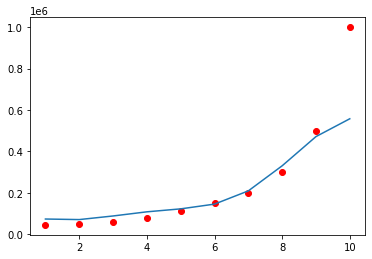

In [27]:
#Visualizing SVR
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X)))
plt.show()


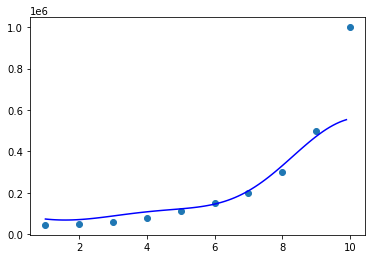

In [31]:
#Visualizing SVR in higher resoloution
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(-1,1)
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(y))
plt.plot(X_grid, sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')


In [33]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:2].values   # or dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1].values  #No scaling needed
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [34]:
regressor.predict([[6.5]])

array([150000.])

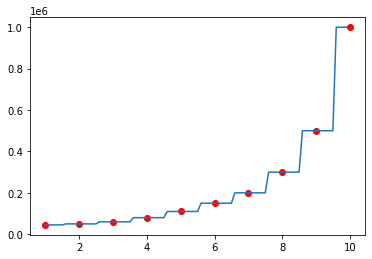

In [38]:
X_grid= np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(-1,1)
plt.scatter(X,y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid))

In [39]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:2].values   # or dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1].values  #No scaling needed
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [40]:
regressor.predict([[6.5]])

array([167000.])

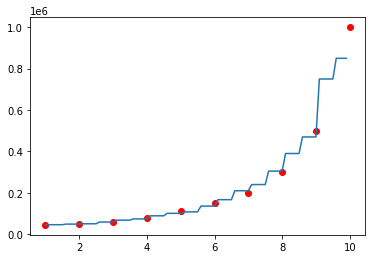

In [41]:
X_grid= np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(-1,1)
plt.scatter(X,y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid))

## Conclusion of Part 2 - Regression
Hello my friends,

Here are some bonus questions and their answers that are often asked by the Data Science community.

1. What are the pros and cons of each Regression model?

Please find here a cheat-sheet that gives you all the pros and the cons of each regression model.

2. How can I improve each Regression models?

In Part 10 - Model Selection, you will find the second section dedicated to Parameter Tuning, that will allow you to improve the performance of your models, by tuning them. You probably already noticed that each model is composed of two types of parameters:

the parameters that are learnt, for example the coefficients in Linear Regression,

the hyperparameters.

The hyperparameters are the parameters that are not learnt and that are fixed values inside the model equations. For example, the regularization parameter lambda or the penalty parameter C are hyperparameters. So far we used the default value of these hyperparameters, and we haven't searched for their optimal value so that your model reaches even higher performance. Finding their optimal value is exactly what Parameter Tuning is about. So for those of you already interested in improving your model performance and doing some parameter tuning, feel free to jump directly to Part 10 - Model Selection.

And as a BONUS, please find here some slides we made about Regularization.

Now congratulations for having completed Part 2, and let's move on to the next part of the journey: